# Neural Network Classifier
A neural network is a set of weighted sums, feeding functions called neurons. The function need not be linear, but must support the math required for back propagation when figureing the weights. tanh is a common activation function. Neurons are in layers. This is a trained system. neural networks can produce linear results, or operated as a classifier.

This is a classifier example.  It will use flower classification.

Start by importing a lot of stuff

In [1]:
import sklearn.datasets as datasets
import sklearn
import sklearn.neural_network as nn
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random
random.seed(2019) # so I can rerun things

Pick up some data about flowers (iris). This classifies them into one of 3 species based on characteristics.

In [2]:
iris=datasets.load_iris()

Take a look at the iris data

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

From the description, expect 4 input variables, and one output variable.

The algorithms used in neural networks generally require some form of normalization or scaling.  The data needs to scaled on a column by column basis. Scaling is normally done from 0 to 1, or from -1 to +1.  That keeps things from blowing up unexpectedly.  There are library routines to do normalization, but let's do it in python.

First, get the data, and seperate it into training and testing sets.  I'll use 75% for training.

In [4]:
dlen=len(iris.data)
print("there are {} iris entries".format(dlen))
ix_set=[ x for x in range(dlen)]
random.shuffle(ix_set)
ntrain=int(dlen*0.75)
trainx=[iris.data[x] for x in ix_set[:ntrain]]
trainy=[iris.target[x] for x in ix_set[:ntrain]]
testx=[iris.data[x] for x in ix_set[ntrain:]]
testy=[iris.target[x] for x in ix_set[ntrain:]]
print(trainx[:5],trainy[:5])

there are 150 iris entries
[array([4.4, 3. , 1.3, 0.2]), array([5.7, 2.6, 3.5, 1. ]), array([6.8, 3. , 5.5, 2.1]), array([5.6, 2.7, 4.2, 1.3]), array([6.7, 3. , 5.2, 2.3])] [0, 1, 2, 1, 2]


Create a nn mlp classifier. Set it to 1 hidden layer to start, and then play with it. Neural networks can also be overfit.


In [5]:
clf=nn.MLPClassifier(hidden_layer_sizes=(4,),activation='tanh',
                   max_iter=2000,random_state=33313 )

Now, normalize things

In [6]:
minx=[+m.inf for x in range(4)]
maxx=[-m.inf for x in range(4)]
# find the min and max of each column
for ix in testx:
    for ic in range(4):
        if ix[ic]<minx[ic]:
            minx[ic]=ix[ic]
        if ix[ic]>maxx[ic]:
            maxx[ic]=ix[ic]
# compute the scale factor
scx=[ maxx[ic]-minx[ic] for ic in range(4)]
print(minx,maxx,scx)
# Apply the scaling to each column in the data
def scem(x):
    global minx,scx
    rv=[]
    for ic in range(4):
        rv.append((x[ic]-minx[ic])/scx[ic])
    return rv
# scale the training input
Strainx=[scem(x) for x in trainx]
# scale the test input
# important not to use the test for min, max, and scx
Stestx=[scem(x) for x in testx]

[4.4, 2.2, 1.3, 0.1] [7.7, 4.4, 6.7, 2.3] [3.3, 2.2, 5.4, 2.1999999999999997]


In [7]:
clf.fit(Strainx,trainy)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=33313, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Use the score function to determine how well we did

In [8]:
clf.score(Stestx,testy)

1.0

Use a package from the github to draw the neural net... It is in the directory I started jupyter notebook in, and you just import it like any other module.

In [9]:
from draw_neural_net import draw_neural_net

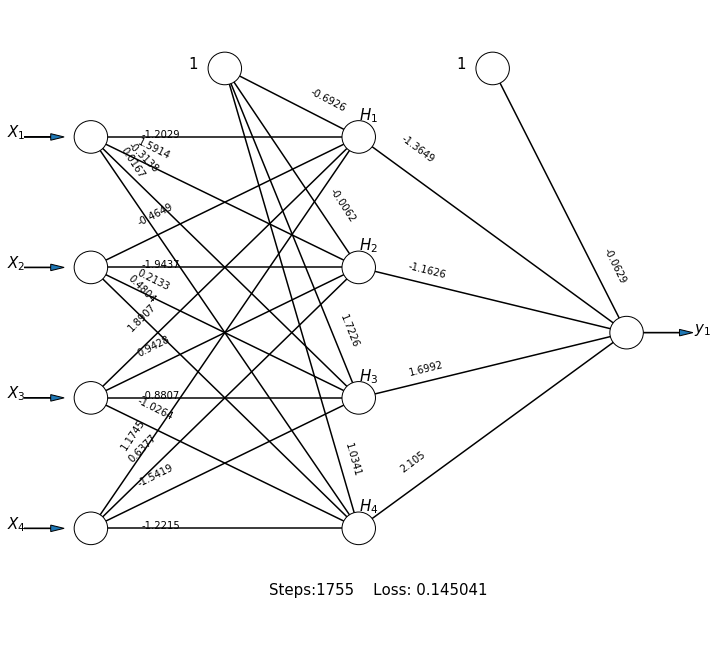

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, 
                [4,4,1], clf.coefs_, 
                clf.intercepts_, clf.n_iter_, clf.loss_)

It shows the score. (100% correct), a connection/weight picture, the number of steps required to get the weights, and a Loss term, where smaller is better.

Now, play with it a little. Cut the middle layer down to 2 neurons and see how it does.  Use cut and paste for most of the work.

0.5789473684210527


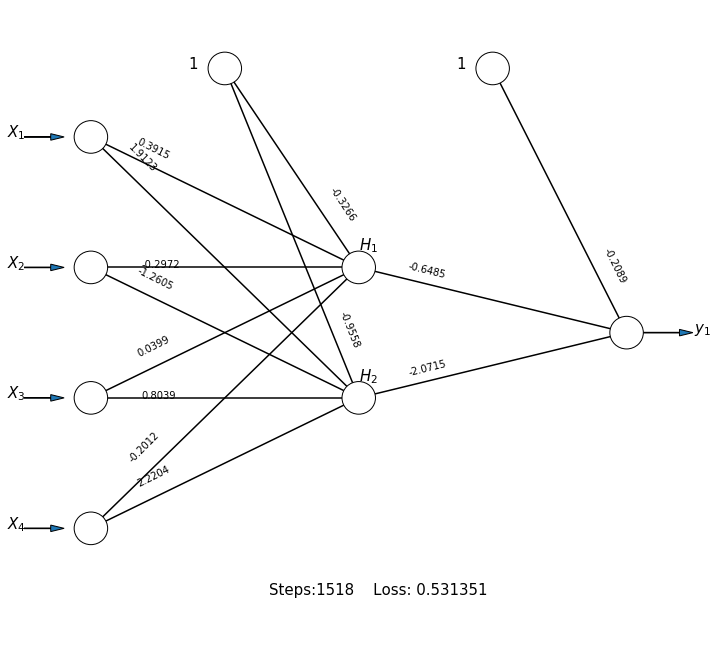

In [11]:
clf1=nn.MLPClassifier(hidden_layer_sizes=(2,),activation='tanh',
                   max_iter=20000,random_state=42 )
clf1.fit(Strainx,trainy)
print(clf1.score(Stestx,testy))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, 
                [4,2,1], clf1.coefs_, 
                clf1.intercepts_, clf1.n_iter_, clf1.loss_)

It really didn't do very well. The algorithm used starts the network in a random place, and then improves the solution until it finds a minimum. 

Play with the random_state parameter (A random number seed) to see if it gets better.

1.0


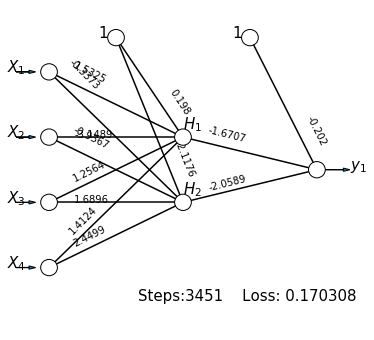

In [18]:
clf1=nn.MLPClassifier(hidden_layer_sizes=(2,),activation='tanh',
                   max_iter=20000,random_state=4257 )
clf1.fit(Strainx,trainy)
print(clf1.score(Stestx,testy))
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, 
                [4,2,1], clf1.coefs_, 
                clf1.intercepts_, clf1.n_iter_, clf1.loss_)

Not bad, its cheaper to build.  

Try it with the rectifier function

1.0


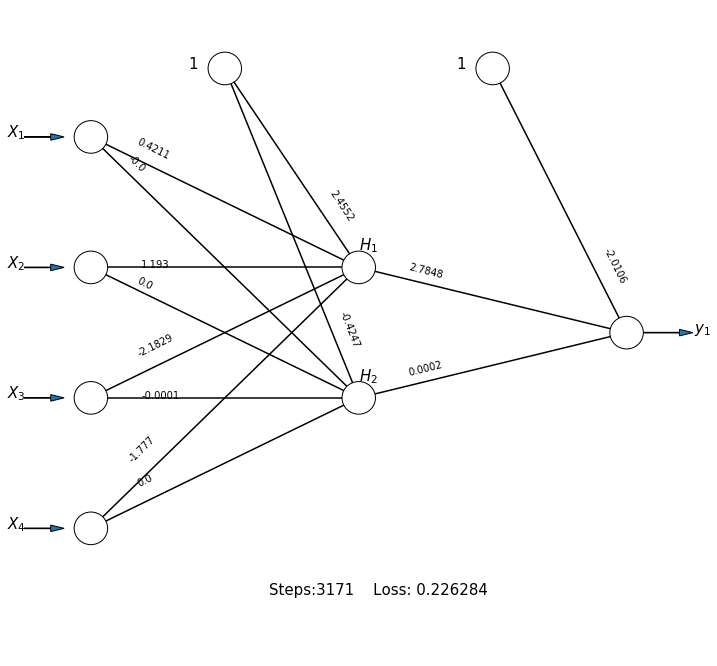

In [13]:
clf1=nn.MLPClassifier(hidden_layer_sizes=(2,),activation='relu',
                   max_iter=20000,random_state=1215 )
clf1.fit(Strainx,trainy)
print(clf1.score(Stestx,testy))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, 
                [4,2,1], clf1.coefs_, 
                clf1.intercepts_, clf1.n_iter_, clf1.loss_)

stay with the rectifier activation function, and see how things look with 2 hidden layers of 4 neurons each

1.0


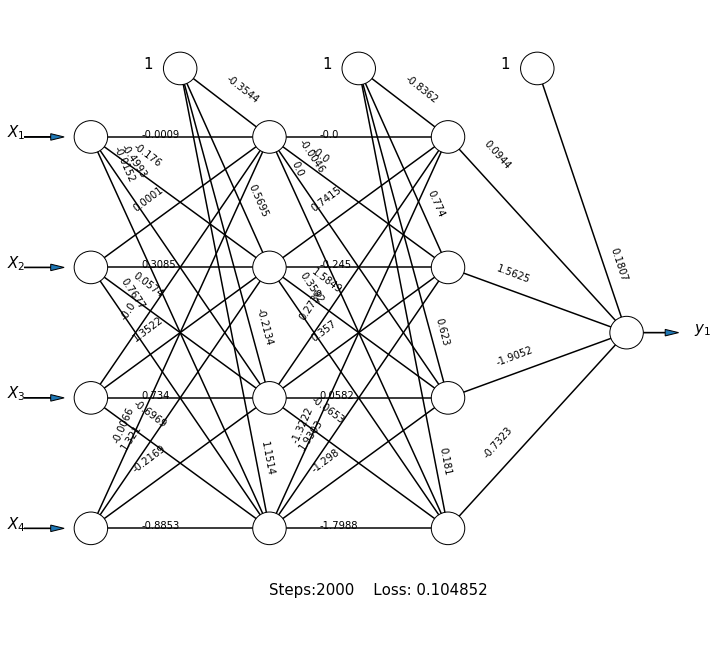

In [14]:
clf1=nn.MLPClassifier(hidden_layer_sizes=(4,4),activation='relu',
                   max_iter=20000,random_state=121 )
clf1.fit(Strainx,trainy)
print(clf1.score(Stestx,testy))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, 
                [4,4,4,1], clf1.coefs_, 
                clf1.intercepts_, clf1.n_iter_, clf1.loss_)

The loss is better. It has less trouble getting it right.

Let's try the sigmoid function 'logistic'

1.0


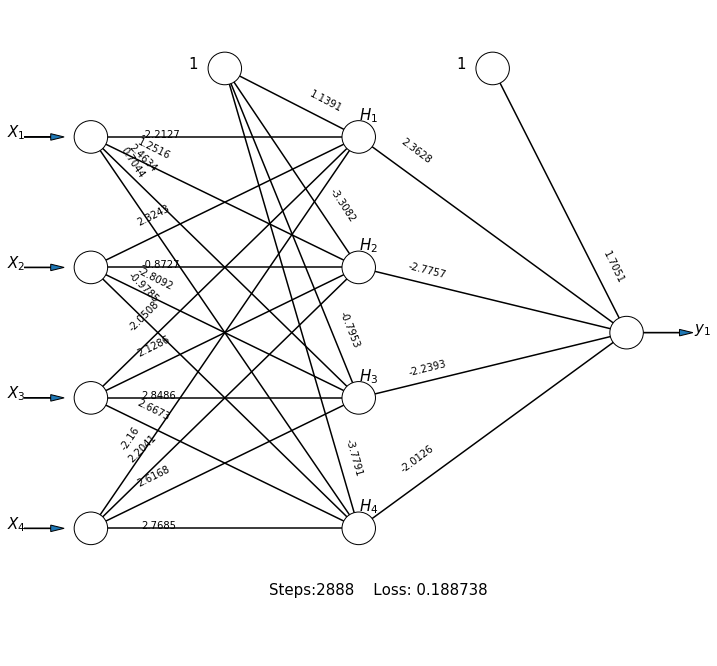

In [15]:
clf1=nn.MLPClassifier(hidden_layer_sizes=(4,),
                   activation='logistic',
                   max_iter=20000, random_state=32557 )
clf1.fit(Strainx,trainy)
print(clf1.score(Stestx,testy))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, 
                [4,4,1], clf1.coefs_, 
                clf1.intercepts_, clf1.n_iter_, clf1.loss_)

Throw in another layer to see what happens

1.0


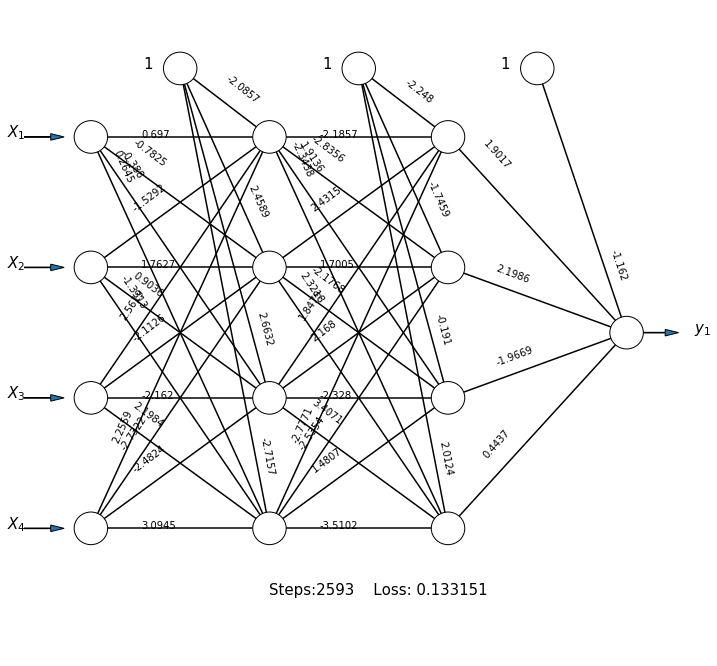

In [16]:
clf1=nn.MLPClassifier(hidden_layer_sizes=(4,4),
                      activation='logistic',
                   max_iter=20000 , random_state=5455)
clf1.fit(Strainx,trainy)
print(clf1.score(Stestx,testy))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, 
                [4,4,4,1], clf1.coefs_, 
                clf1.intercepts_, clf1.n_iter_, clf1.loss_)

Neural networks can make a good classifier.  Remember a few things

* Input normalization is typically required
* More layiers and larger layers can lead to overfitting
* Easiest network to visualize and implement
* Results can be improved playing with the random_state seed